In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Initialize the FRED API with your key
fred = Fred(api_key='5079f41d061a4037d81f3da69e018803') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [3]:
yields.index = pd.to_datetime(yields.index)

In [4]:
yields = yields.dropna()
y_std = yields.std()
y_std

1 Month    1.705851
3 Month    1.733347
6 Month    1.746829
1 Year     1.684091
2 Year     1.545413
3 Year     1.446639
5 Year     1.309345
7 Year     1.226457
10 Year    1.174092
20 Year    1.206514
30 Year    1.108774
dtype: float64

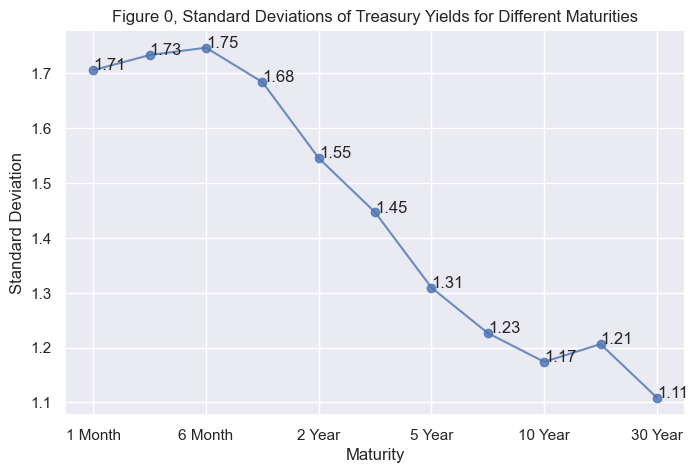

In [5]:
fig, ax = plt.subplots()
y_std.plot(figsize = (8,5),marker='o', title='Figure 0, Standard Deviations of Treasury Yields for Different Maturities', alpha=0.8) # Plot standard deviations of yields of different maturies
plt.xlabel("Maturity")
plt.ylabel("Standard Deviation")
for i in range(len(y_std)):
    ax.annotate(str(round(y_std.iloc[i],2)),xy=(i,y_std.iloc[i]))
plt.show()

Figure 3


C:\Users\DELL\AppData\Local\Temp\ipykernel_49244\1226209266.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


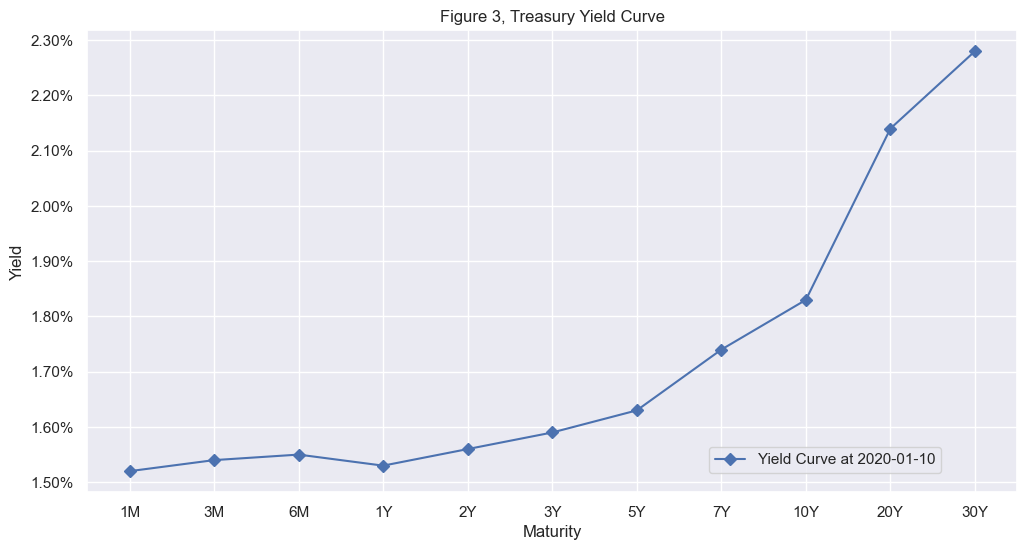

In [6]:
def plot_yield_curve(date, fig_n):
    maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title(fig_n+'Treasury Yield Curve')


    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

print("Figure 3")
plot_yield_curve('2020-01-10','Figure 3, ')


In [7]:
!pip install nelson_siegel_svensson


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Import the packages for fitting NS model
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np

In [9]:
# Create maturity and yield variables in array form
t = np.array([0.08333,0.25,0.5,1,2,3,5,7,10,20,30])
y = np.array(yields.loc["2020-01-10"])

In [10]:
# Fit an NS model for yields from 2020-01-10
curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(2.6376805011083615), beta1=np.float64(-1.1025855357123264), beta2=np.float64(-1.1406474779544136), tau=np.float64(4.750012469139109))


Text(0.5, 1.0, 'Figure 4, NS Model Result')

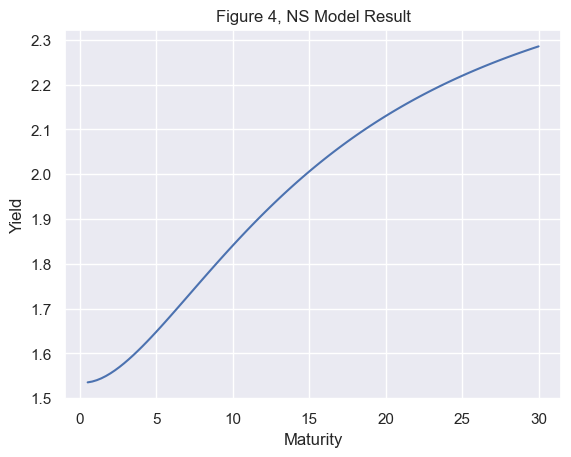

In [11]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 4, NS Model Result")

C:\Users\DELL\AppData\Local\Temp\ipykernel_49244\1226209266.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


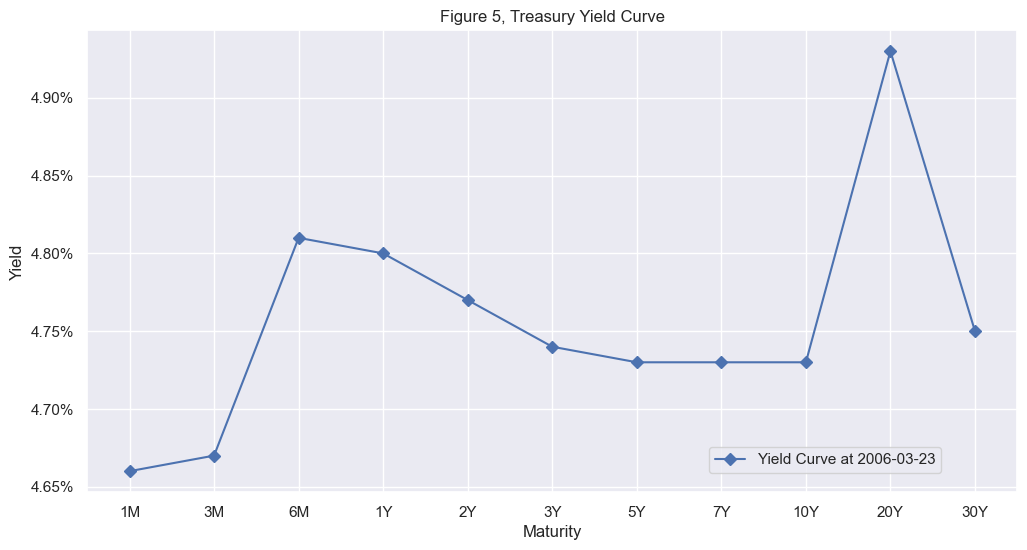

In [12]:
plot_yield_curve('2006-03-23','Figure 5, ')


In [13]:
y = np.array(yields.loc["2006-03-23"])
curve, status = calibrate_ns_ols(t, y, tau0=0.5)  # starting value of 0.5 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(4.769301553939568), beta1=np.float64(-0.18608573203545753), beta2=np.float64(0.25937113055964856), tau=np.float64(0.25704878221353844))


Text(0.5, 1.0, 'Figure 6, NS Model Result')

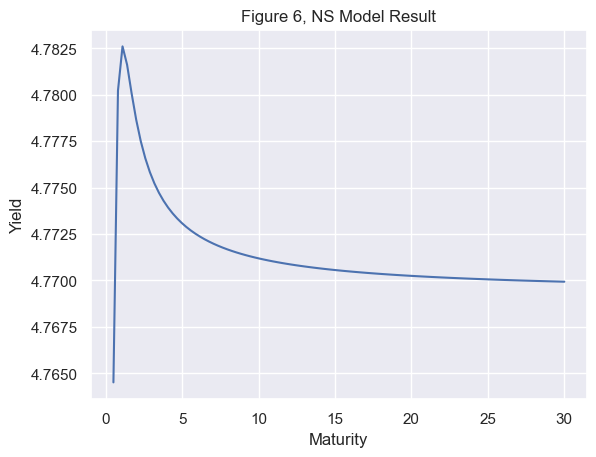

In [14]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 6, NS Model Result")

In [15]:
yields.loc["2020-01-10"]

1 Month    1.52
3 Month    1.54
6 Month    1.55
1 Year     1.53
2 Year     1.56
3 Year     1.59
5 Year     1.63
7 Year     1.74
10 Year    1.83
20 Year    2.14
30 Year    2.28
Name: 2020-01-10 00:00:00, dtype: float64

In [16]:
t = np.array([2,5,10,30])
y = np.array([1.56,1.63,1.83,2.28])

In [17]:
# Create output vector y (out variable) and squared matrix A (input variable)
out = np.array([1.56,1.63,1.63,1.83,1.83,2.28,0,0,0,0,0,0])
input = np.array([[8,4,2,1,0,0,0,0,0,0,0,0],[125,25,5,1,0,0,0,0,0,0,0,0],[0,0,0,0,125,25,5,1,0,0,0,0],[0,0,0,0,1000,100,10,1,0,0,0,0], \
                  [0,0,0,0,0,0,0,0,1000,100,10,1],[0,0,0,0,0,0,0,0,27000,900,30,1],[75,10,1,0,-75,-10,-1,0,0,0,0,0],[0,0,0,0,300,20,1,0,-300,-20,-1,0], \
                  [30,2,0,0,-30,-2,0,0,0,0,0,0],[0,0,0,0,60,2,0,0,-60,-2,0,0],[12,2,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,180,2,0,0]])

In [18]:
# Solve for coefficient vector and reshape to an 3 by 4 array (lines variable)
# Make sure to give enough decimals since all coefficients are relatively small. If there is not decimal points, the following coefficient results and graphs will be rough
lines = np.round(np.dot(np.linalg.inv(input), out).reshape(-1,4),decimals=8)
lines

array([[ 3.96060000e-04, -2.37634000e-03,  2.45215100e-02,
         1.51729391e+00],
       [-3.31400000e-04,  8.53548000e-03, -3.00376300e-02,
         1.60822581e+00],
       [ 2.34400000e-05, -2.10968000e-03,  7.64139800e-02,
         1.25338710e+00]])

In [19]:
# Calculates x**0 + x**1 + x**2 + x**3
def plot_num(values, coeffs):
    # Coeffs are assumed to be in order 0, 1, ..., n-1
    expanded = np.hstack([coeffs[i] * (values ** i) for i in range(0, len(coeffs))])
    return np.sum(expanded, axis=1)


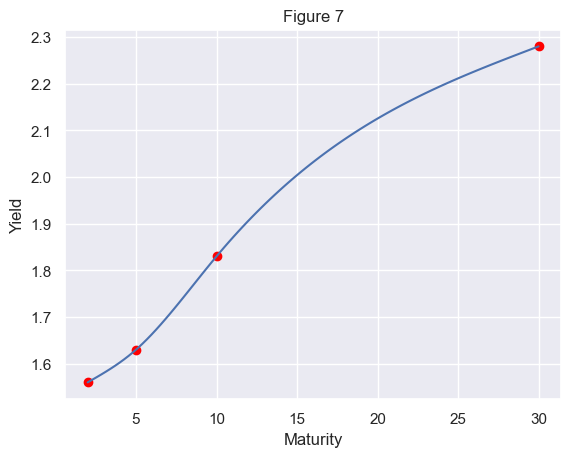

In [20]:
# Simulate the 100 paired data points and draw the graph
xs = np.linspace(2,30, 100)

y1s = plot_num(xs[xs<5].reshape(-1,1), lines[0][::-1])
y2s = plot_num(xs[(xs>=5) & (xs<10)].reshape(-1,1), lines[1][::-1])
y3s = plot_num(xs[xs>=10].reshape(-1,1), lines[2][::-1])
ys = np.concatenate([y1s, y2s, y3s])


plt.plot(xs, ys)
plt.scatter(t, y,c="red")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 7")
plt.show()
